# ETAPA 3: MODELO BASELINE


## 1. IMPORTAÇÕES

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import os

print('Bibliotecas importadas!')

Bibliotecas importadas!


## 2. CARREGAR DADOS

In [35]:
df = pd.read_csv('dataset_preprocessado.csv')
print(f'Dataset: {df.shape}')
print('Colunas:', list(df.columns))

Dataset: (2510, 44)
Colunas: ['sale_id', 'marketing_spend', 'website_traffic', 'conversion_rate', 'avg_product_rating', 'discount_percentage', 'num_products', 'avg_price', 'customer_reviews', 'return_rate', 'competition_level', 'seasonality', 'free_shipping', 'mobile_traffic_pct', 'monthly_sales', 'product_category_  Electronics ', 'product_category_  Fashion ', 'product_category_  Home ', 'product_category_  Sports ', 'product_category_BOOKS', 'product_category_Books', 'product_category_ELECTRONICS', 'product_category_Electronics', 'product_category_FASHION', 'product_category_Fashion', 'product_category_HOME', 'product_category_Home', 'product_category_SPORTS', 'product_category_Sports', 'payment_methods_  Credit Card ', 'payment_methods_  Debit Card ', 'payment_methods_  PayPal ', 'payment_methods_BANK TRANSFER', 'payment_methods_Bank Transfer', 'payment_methods_CREDIT CARD', 'payment_methods_Credit Card', 'payment_methods_DEBIT CARD', 'payment_methods_Debit Card', 'payment_methods_

## 3. CORRIGIR DADOS

In [36]:
# REMOVER COLUNA sale_id
if 'sale_id' in df.columns:
    df = df.drop('sale_id', axis=1)
    print('Coluna sale_id removida')

# CONVERTER TODAS AS COLUNAS OBJECT PARA NUMÉRICAS
object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    if col != 'monthly_sales':
        # Tentar converter para numérico
        df[col] = pd.to_numeric(df[col], errors='coerce')
        # Preencher NaN com 0
        df[col] = df[col].fillna(0)
        print(f'Convertida: {col}')

print('Todas as colunas convertidas!')
print('Tipos finais:', df.dtypes.value_counts())

Coluna sale_id removida
Convertida: competition_level
Convertida: seasonality
Convertida: free_shipping
Todas as colunas convertidas!
Tipos finais: bool       25
float64    16
int64       2
Name: count, dtype: int64


## 4. PREPARAR DADOS

In [37]:
X = df.drop('monthly_sales', axis=1)
y = df['monthly_sales']

print(f'X: {X.shape}, y: {y.shape}')
print('Todas as colunas são numéricas:', X.select_dtypes(exclude=['number']).shape[1] == 0)

X: (2510, 42), y: (2510,)
Todas as colunas são numéricas: False


## 5. DIVISÃO DOS DADOS

In [38]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

print(f'Treino: {X_train.shape}')
print(f'Validação: {X_val.shape}')
print(f'Teste: {X_test.shape}')

Treino: (1506, 42)
Validação: (502, 42)
Teste: (502, 42)


## 6. TREINAR MODELO

In [39]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

print('Modelo treinado!')

y_pred_train = modelo.predict(X_train)
y_pred_val = modelo.predict(X_val)

print('Previsões feitas!')

Modelo treinado!
Previsões feitas!


## 7. MÉTRICAS

In [40]:
r2_treino = r2_score(y_train, y_pred_train)
r2_val = r2_score(y_val, y_pred_val)

print(f'R² Treino: {r2_treino:.4f}')
print(f'R² Validação: {r2_val:.4f}')
print(f'Diferença: {abs(r2_treino - r2_val):.4f}')

R² Treino: 0.4043
R² Validação: 0.3731
Diferença: 0.0311


## 8. SALVAR MODELO

In [41]:
os.makedirs('models', exist_ok=True)
joblib.dump(modelo, 'models/modelo_baseline.pkl')
print('Modelo salvo!')

Modelo salvo!


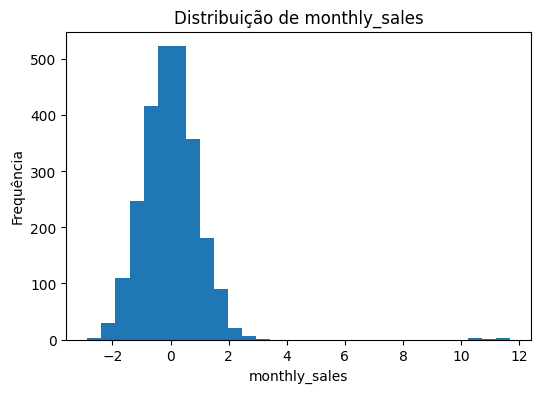

In [42]:

# Gráfico: Distribuição da variável target
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(df['monthly_sales'], bins=30)
plt.title('Distribuição de monthly_sales')
plt.xlabel('monthly_sales')
plt.ylabel('Frequência')
plt.show()


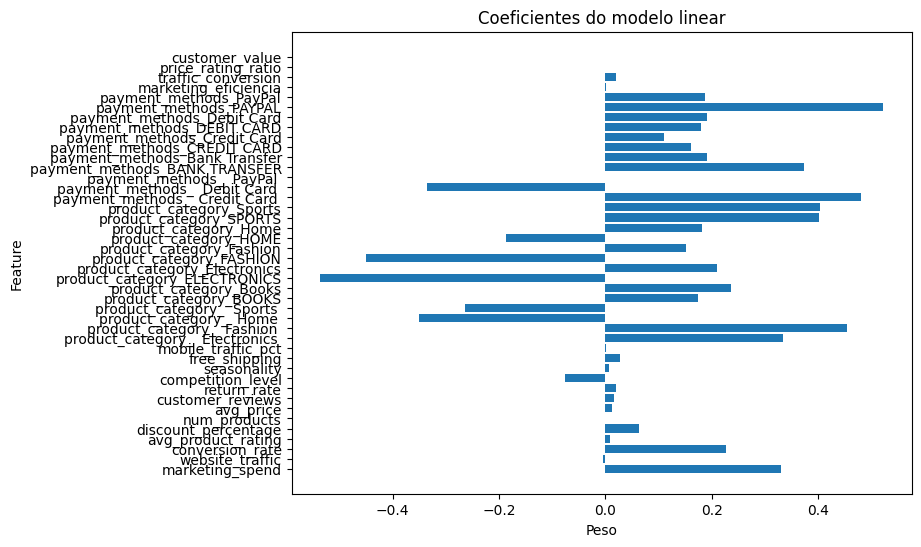

In [43]:

# Gráfico: Coeficientes do modelo linear
coef = modelo.coef_
features = X.columns
plt.figure(figsize=(8,6))
plt.barh(features, coef)
plt.title('Coeficientes do modelo linear')
plt.xlabel('Peso')
plt.ylabel('Feature')
plt.show()


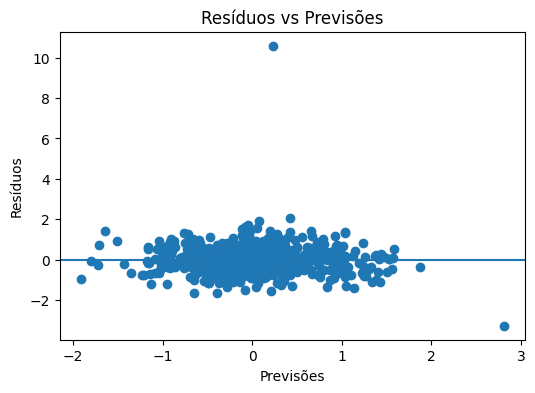

In [44]:

# Gráfico: Resíduos vs valores previstos
residuos = y_val - y_pred_val
plt.figure(figsize=(6,4))
plt.scatter(y_pred_val, residuos)
plt.axhline(0)
plt.title('Resíduos vs Previsões')
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()
